<a href="https://colab.research.google.com/github/keehyun2/TestPy/blob/master/colab/7-3-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN model

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [93]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [94]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# keras 의 fashion_mnist 데이터를 가져옴.
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()


In [95]:
# 코드가 너무 오래 실행되서 데이터를 10분의 1로 무작위 추출 (데이터를 줄인만큼 모델정확도 떨어짐. )

# 10분의 1로 무작위 추출 (6,000개)
train_input, _, train_target, _ = train_test_split(
    train_input, train_target, train_size=0.1, stratify=train_target, random_state=42)

# 테스트 데이터도 줄이고 싶다면
test_input, _, test_target, _ = train_test_split(
    test_input, test_target, train_size=0.1, stratify=test_target, random_state=42)

In [96]:
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [97]:
print(train_scaled.shape)

(4800, 28, 28)


### 100개의 뉴런을 가진 은닉층 예시
| 은닉 뉴런  | 의미 (예시)    |
| ------ | ---------- |
| 뉴런 1   | 밝은 배경      |
| 뉴런 5   | 좌우 대칭 형태   |
| 뉴런 12  | 발끝이 뾰족한 모양 |
| 뉴런 47  | 소매가 긴 형태   |
| ...    | ...        |
| 뉴런 100 | 어두운 실루엣    |


In [98]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [99]:
model = model_fn()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [101]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


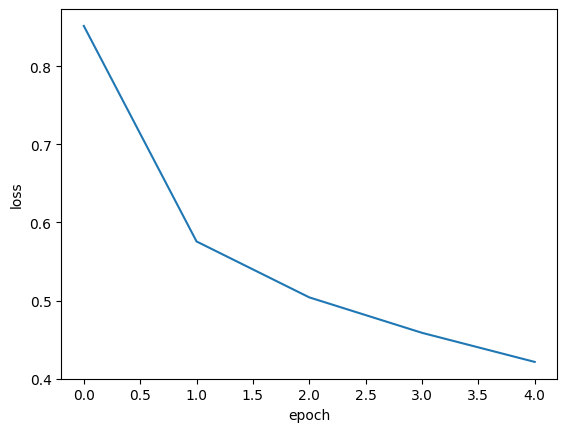

In [102]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

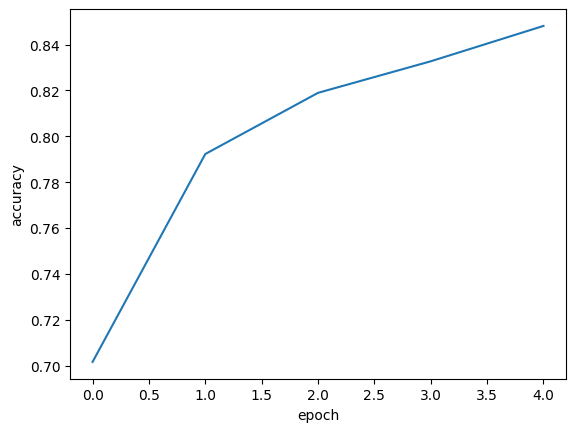

In [103]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [133]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
# epochs 가 20 인데 20회 반복학습을 줄여도 좀 빨라질듯... (손실값을 오를듯)
# vervose 0 은 진행상황 안나옴. 1(기본값) 은 진행바가 실시간으로 나옴.
# 2는 text 로 1 epoch 가 끝나면 나옴

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


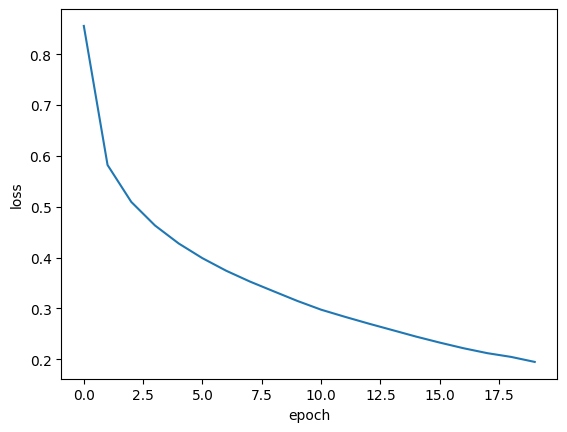

In [106]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [107]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
# model 훈련하는 과정에서 validation_data 파라미터를 줘서 검증을 동시에 진행함.

In [108]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


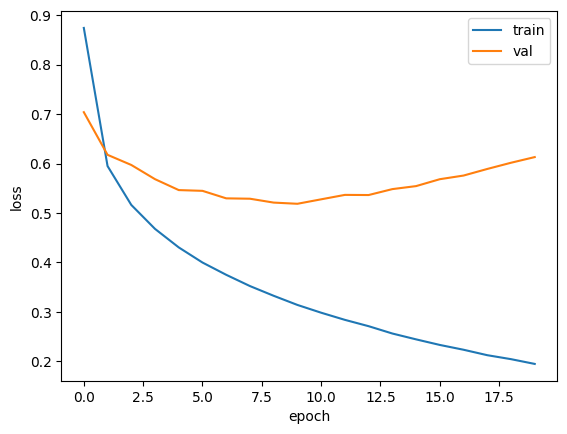

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [110]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

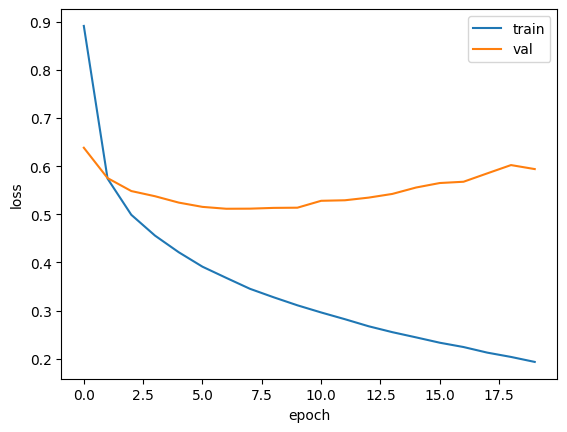

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [ ]:
# 과적합 방지용 정규화 기법
# 은닉층(100개의 특징으로 추출) 의 뉴런중 30% 를 제거함. 30% 의 특징을 제거 한다는 의미
#
# 이전에 배운 정규화기법 - L1 (Lasso) 및 L2 (Ridge) 정규화를 목적 함수에
# 포함하여 과적합(overfitting)을 방지합니다.

In [112]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

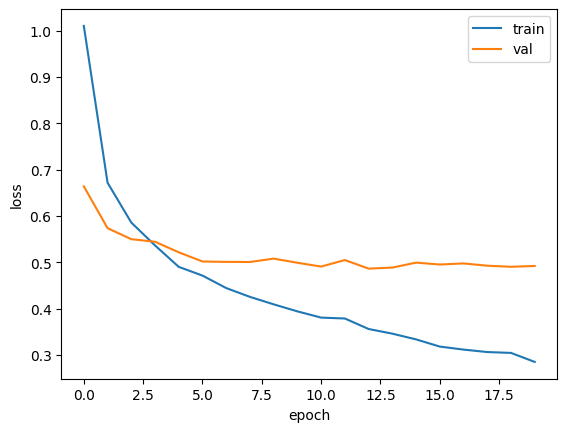

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [132]:
# 중간에 drop out 층을 추가하면서 검증세트의 손실값이 많이 내려고. 훈련세트의 손실값이 조금 오름

## 모델 저장과 복원

In [115]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [116]:
model.save('model-whole.keras') # 모델 전체를 저장

In [117]:
model.save_weights('model.weights.h5') # 가중치만 저장

In [ ]:
# 저장 크기는 가중치만 저장하는게 작지만.. 별차이 없는 듯

In [118]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Jul 17 00:34 model.weights.h5
-rw-r--r-- 1 root root 979395 Jul 17 00:34 model-whole.keras


In [119]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

In [120]:
import numpy as np
result = model.predict(val_scaled)
print(result.shape)
print(np.sum(result[1]))  # 테스트로 2번째 예측 결과를 합쳐봄.
# 마지막에 활성화 함수를 softmax 를 사용해서
# 전체 합이 1이 나오는 각 class 의 확률을 보여줌.
print(result[0]) # 지수 표기로 나옴.
np.set_printoptions(suppress=True) # decimal format 으로 나오게 하는 옵션(실수)
print(result[0])
# print(result.size) # 1200 개

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1200, 10)
1.0
[0.00387532 0.00247558 0.7589082  0.03156519 0.14085989 0.00012309
 0.06159383 0.00001713 0.00054704 0.00003461]
[0.00387532 0.00247558 0.7589082  0.03156519 0.14085989 0.00012309
 0.06159383 0.00001713 0.00054704 0.00003461]


In [121]:
# model.predict(val_scaled).shape 는 (1200, 10) 이고 val_target.shape 는 (1200, 1)
# 예측이 정확한지 비교하려면 작업이 필요함..
# 1200 개의 예측 결과임. 각 class 별 확률인데 제일 높은 확률을 가진 class(종류) 의
# index 를 가져오기 위해 np.argmax 를 사용했고 1200 개의 각 array 에서 최대 값의 index 를 계산함

In [122]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.8266666666666667


In [123]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.5394


[0.4945885241031647, 0.8266666531562805]

In [ ]:
# 검증 데이터로 모델 평가시 손실값 0.49, 정확도 0.82 가 나타남.

## 콜백

In [ ]:
# epoch 가 진행되는 동안 가장 좋은 손실값과 정확도를 보인 경우 모델을 저장하도록 콜백 지정

In [134]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

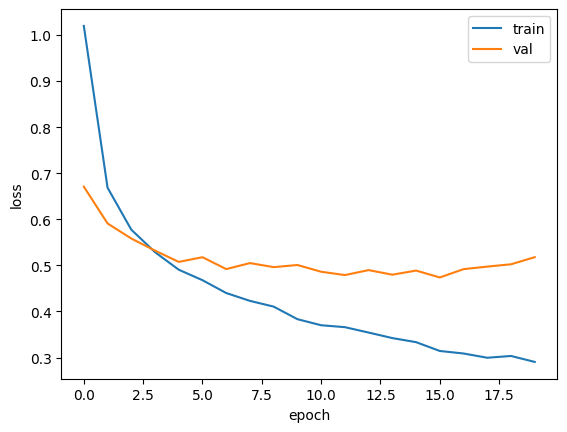

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [136]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8194 - loss: 0.5264


[0.47385451197624207, 0.8308333158493042]

In [ ]:
# 위에 그래프를 보면 10 에포크 이후 계속 검증데이터의 손실값 감소가 크지 않고 오히려 증가하기도함.
# keras.callbacks.EarlyStopping 를 사용해서 조기 종료 시킴.

In [126]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [127]:
print(early_stopping_cb.stopped_epoch)

8


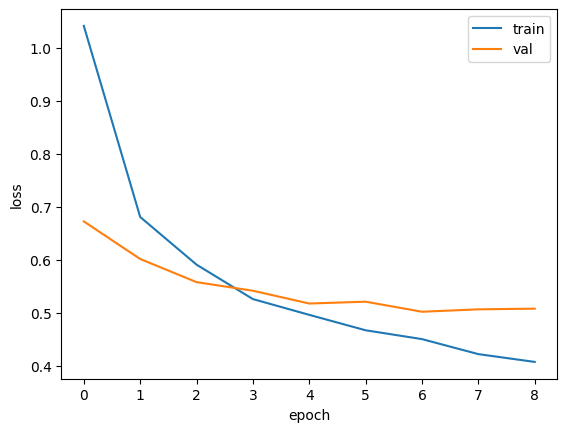

In [128]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [129]:
model.evaluate(val_scaled, val_target)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.5419


[0.5015154480934143, 0.82833331823349]